### Applying spatial filtering for blurring/noise reduction 

In [1]:
import cv2
from PIL import Image
import numpy as np

(688, 688)


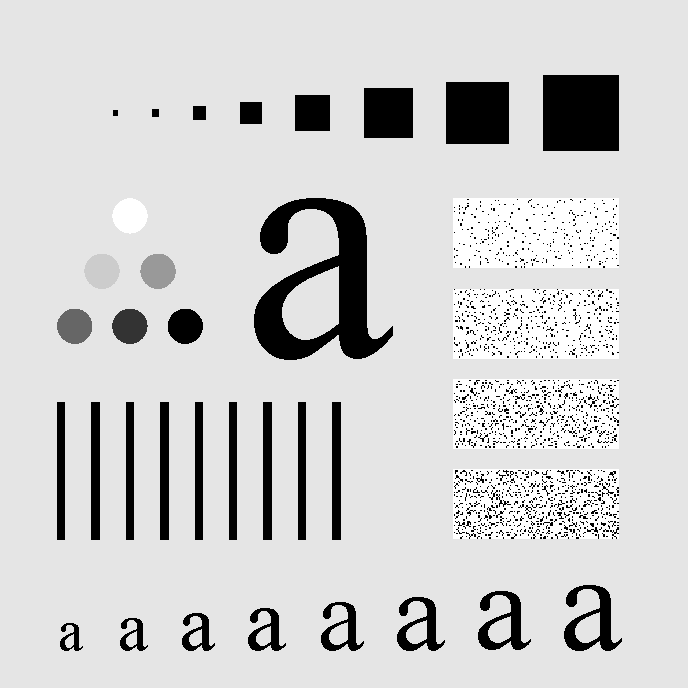

In [2]:
img = cv2.imread('smoothing.tif', 2)
print img.shape
Image.fromarray(img)

In [7]:
def spatialfilter(img, filtersize, weights):
    imgshow = Image.fromarray(img)
    imgshow.show()
    
    arrayfilter = np.ones((filtersize,filtersize)) * weights
    print(arrayfilter)
    
    [height, width] = img.shape
    newimg          = img.copy()

    arraytemp       = np.zeros((filtersize,filtersize), np.int16)
    [a,b]           = arraytemp.shape
    b               = (a-1) / 2
    aaxis           = np.linspace(-b,b,a).astype(np.int8)
    baxis           = np.linspace(-b,b,a).astype(np.int8)

    for y in range(height):
        for x in range(width):
            endy = a+y
            endx = a+x
            if endy < height and endx < width:
                arraytemp    = np.multiply(arrayfilter, img[y:endy, x:endx])
                newimg[y+b][x+b] = arraytemp.sum()
    
    newimgshow = Image.fromarray(newimg)
    newimgshow.show()
                
        

In [9]:
#make filter

In [8]:
spatialfilter(img, 35, (1/(35.0*35)))

[[0.00081633 0.00081633 0.00081633 ... 0.00081633 0.00081633 0.00081633]
 [0.00081633 0.00081633 0.00081633 ... 0.00081633 0.00081633 0.00081633]
 [0.00081633 0.00081633 0.00081633 ... 0.00081633 0.00081633 0.00081633]
 ...
 [0.00081633 0.00081633 0.00081633 ... 0.00081633 0.00081633 0.00081633]
 [0.00081633 0.00081633 0.00081633 ... 0.00081633 0.00081633 0.00081633]
 [0.00081633 0.00081633 0.00081633 ... 0.00081633 0.00081633 0.00081633]]
